In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def boxplot_with_dots(df, columns, value = None):
    fig, ax = plt.subplots(figsize=(4, 3), dpi=150)

    # Boxplot
    data = [df[col].dropna() for col in columns]
    ax.boxplot(data, widths=0.6)

    # Add dots (jittered)
    for i, col in enumerate(columns, start=1):
        y = df[col].dropna()
        x = np.random.normal(i, 0.04, size=len(y))  # jitter
        ax.scatter(x, y, alpha=0.6)

    ax.set_xticks(range(1, len(columns) + 1))
    ax.set_xticklabels(columns, rotation=45)
    ax.set_ylabel(value)

    plt.tight_layout()
    plt.show()


In [2]:
path = "/mnt/c/Users/Elena/Desktop/Data_processing/test/res/results.csv"

In [3]:
df = pd.read_csv(path, encoding="latin1")

In [5]:
df.head()

,File_name,Nucleus_area,Nucleus_MFI,Foci_number,All_foci_IFI_photons,All_foci_MFI_px,All_foci_sigma_nm,Outliers_number,Outliers_MFI_px,Outliers_sigma_nm
0,C2_MP_U2OS_fixed_20nMJF549_ORC1_WT.nd2_(series...,302.964,43.552,1002,10030.212196,0.175127,257.955887,13,0.362317,137.452358
1,C2_MP_U2OS_fixed_20nMJF549_ORC1_WT.nd2_(series...,298.486,15.651,1058,2974.213436,0.089148,201.446394,18,0.252562,139.953426
2,C2_MP_U2OS_fixed_20nMJF549_ORC1_WT.nd2_(series...,354.843,23.877,1159,8422.222742,0.191898,228.394614,31,0.357018,169.451787
3,C2_MP_U2OS_fixed_20nMJF549_ORC1_WT.nd2_(series...,320.457,66.117,1529,4960.124002,0.097450,243.910161,35,0.194112,191.709742
4,C2_MP_U2OS_fixed_20nMJF549_ORC1_WT.nd2_(series...,563.132,30.851,1920,5668.886295,0.133719,225.170768,50,0.267668,186.719348


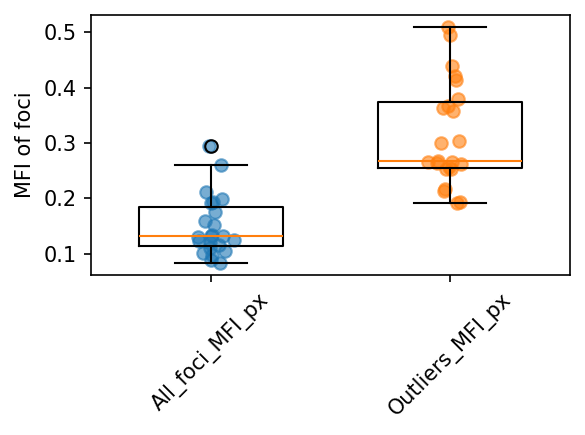

In [16]:
boxplot_with_dots(df, ["All_foci_MFI_px", "Outliers_MFI_px"], "MFI of foci")

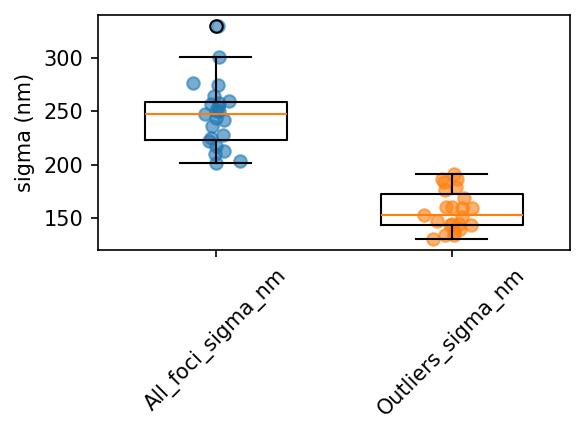

In [17]:
boxplot_with_dots(df, ["All_foci_sigma_nm", "Outliers_sigma_nm"], "sigma (nm)")

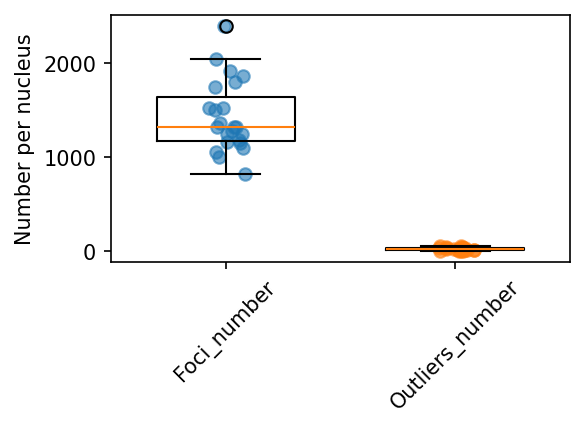

In [18]:
boxplot_with_dots(df, ["Foci_number", "Outliers_number"], "Number per nucleus")